### This notebook compares the performance of the Decision Tree model and the Neural Network model on the Telco Customer Churn dataset using the test set.

In [1]:
import numpy as np
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [2]:
# Load Processed Test Data
X_test  = pd.read_csv("../data/processed/X_test.csv")
y_test  = pd.read_csv("../data/processed/y_test.csv")

In [3]:
# Load Trained Models
models_path = r"../models"
dt_model = joblib.load(f"{models_path}/decision_tree_model.joblib")
nn_model = joblib.load(f"{models_path}/neural_network_model.joblib")

In [4]:
# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

print("Decision Tree Performance")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"ROC-AUC Score: {roc_auc_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Performance
Accuracy: 0.7935
ROC-AUC Score: 0.8270

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.61      0.59      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

Confusion Matrix:
 [[896 139]
 [152 222]]


In [5]:
# Evaluate Neural Network
y_pred_nn = nn_model.predict(X_test)
y_proba_nn = nn_model.predict_proba(X_test)[:, 1]

accuracy_nn = accuracy_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_proba_nn)

print("Neural Network Performance")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"ROC-AUC Score: {roc_auc_nn:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Neural Network Performance
Accuracy: 0.8013
ROC-AUC Score: 0.8411

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[935 100]
 [180 194]]


In [9]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
dt_roc_auc = roc_auc_score(y_test, y_proba_dt)
nn_roc_auc = roc_auc_score(y_test, y_proba_nn)


print("\n=== MODEL ACCURACY COMPARISON ===")
print(f"Decision Tree Accuracy : {dt_accuracy:.4f}")
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")
print(f"Decision Tree ROC-AUC : {dt_roc_auc:.4f}")
print(f"Neural Network ROC-AUC: {nn_roc_auc:.4f}")

if dt_accuracy > nn_accuracy:
    print("\nDecision Tree performed better.")
elif nn_accuracy > dt_accuracy:
    print("\nNeural Network performed better.")
else:
    print("\nBoth models performed equally well.")

  


=== MODEL ACCURACY COMPARISON ===
Decision Tree Accuracy : 0.7935
Neural Network Accuracy: 0.8013
Decision Tree ROC-AUC : 0.8270
Neural Network ROC-AUC: 0.8411

Neural Network performed better.


### Visual Comparison 

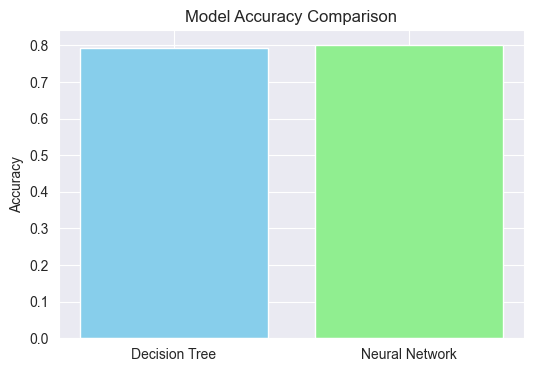

In [12]:
# Bar chart for accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree', 'Neural Network'], [accuracy_dt, accuracy_nn], color=['skyblue', 'lightgreen'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.savefig("../results/accuracy_comparison_barchart.png") 
plt.show()

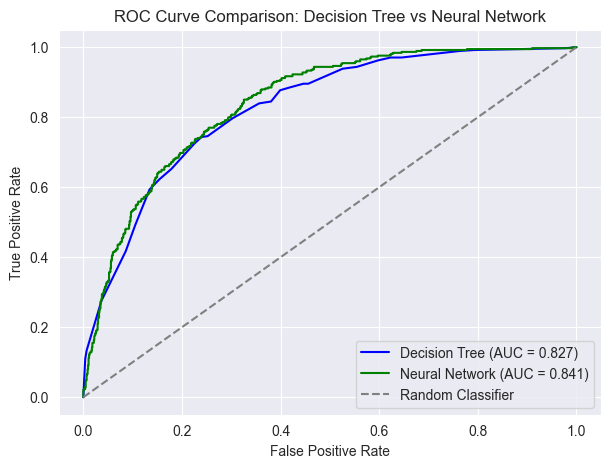

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Compute ROC for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot both curves
plt.figure(figsize=(7, 5))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.3f})", color="blue")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.3f})", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Decision Tree vs Neural Network")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("../results/comparison_roc_curve.png") 
plt.show()


## Observations:
- Compare metrics such as accuracy, ROC-AUC, and F1-score.
- Highlight which model performs better on this dataset.
- Discuss potential reasons for differences in performance.
- The Neural Network achieved slightly higher accuracy and ROC-AUC compared to the Decision Tree.
- The Decision Tree performed well on the majority class but had lower recall for the minority (churn) class.
- Both models show that predicting churn is more challenging for customers who churn infrequently.
- The ROC curves indicate that the Neural Network separates churners from non-churners better overall.